In [ ]:
import torch 
a = torch.rand((50, 10))
b = torch.rand((100, 10))

c = torch.einsum("ij,nj->in", a , b)

(c.view(-1, 1).mm(a.view(1, -1))).shape
c.view(-1, 1).shape
for i in (a):
    print(1)

In [ ]:
a = torch.rand((5, 5)) - torch.rand((5, 5))
c = a.apply_(lambda x: max(0, x))
print(c)
z = (c != torch.tensor([0])) 
torch.tensor([0]) + z

In [ ]:
class Module:
    # Defining __call__ method to keep the easy syntax for the forward prop
    def __call__(self, input):
        return self.forward(input)
    
    def forward(self, input):
        raise NotImplementedError
    
    def backward(self, gradwrtoutput):
        raise NotImplementedError
    
    def params(self):
        raise NotImplementedError

class ReLU(Module):
    
    def forward(self, input):
        return input.apply_(lambda x: max(0, x))

    def derivative(self,input):
        der_bool = (self.forward(input) != torch.tensor([0])) # True if ReLU of x is not zero
        return der_bool #+ torch.tensor([0]) # only to give back non-boolean tensor explicitly

In [ ]:
relu = ReLU()

print(relu(a))
relu.derivative(a)

In [ ]:
a= [3, 4, 0, 7, 4, 87, 23]

a[:-1]

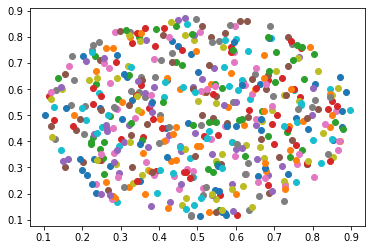

In [4]:
import matplotlib.pyplot as plt
for i in range(target.shape[0]):
    if target[i]:
        plt.scatter(input[i,0], input[i,1])

In [1]:
import torch
from framework import *
from generate_data import *
if torch.cuda.is_available():
    device = torch.device('cpu')
else:
    device = torch.device('cpu')

In [2]:
def compute_nb_errors(pred, target):
    """
    Finds the index of the best pred and the index of the right classification,
    compares and counts the wrong predictions.

    Returns: number of wrong predictions (Int)
    """
    _, pred_index = torch.max(pred, 1)
    _, right_index = torch.max(target, 1)
    wrong = (pred_index != right_index).sum().item()
    return wrong

def compute_nb_errors(pred, target):
    """
    Finds the index of the best pred and the index of the right classification,
    compares and counts the wrong predictions.

    Returns: number of wrong predictions (Int)
    """
    pred = torch.round(pred)
    wrong = (pred != target).sum().item()
    return wrong

In [3]:
input, target, *_ = generate_disc_set(2_000, split=.5, one_hot_labels=False)
print(target)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
      

In [4]:
model = Sequential(Linear(2, 25), Tanh(), Linear(25, 25), ReLU(), Linear(25, 1), ReLU())
#model = Sequential(Linear(2, 25), ReLU(), Linear(25, 2), Sigmoid())

In [5]:
#input = torch.rand(100, 2)
#target = torch.tensor([0 for _ in range(100)])
output = model(input)
loss = MSE(target)
print(output.shape)
print(loss(output))
print(compute_nb_errors(output, target))


for i in range(50_000):
    output = model(input)
    optim = SGD(.0001, input.shape[0])
    loss = MSE(target)
    grads = model.backward(loss)

    model.update(optim)

print(loss(output))
print(compute_nb_errors(output, target))
print(1-compute_nb_errors(output, target)/input.shape[0])


torch.Size([1000, 1])
tensor(11336.2021)
1000
tensor(0.2412)
224
0.224


In [33]:
print(target.shape)
input = torch.distributions.uniform.Uniform(0, 1).sample([100,2])
target = torch.zeros(input.size(0))
target += ((torch.pow(input[:, 0] - .5, 2) + torch.pow(input[:, 1] - .5, 2)) <= 1/(2 * torch.pi))
target

torch.Size([1000, 1])


tensor([1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])